<a href="https://colab.research.google.com/github/Chaitanya-Gumudala-1710/deep_learning/blob/main/hand_written_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


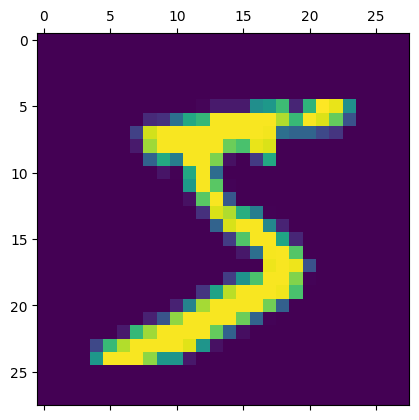

In [3]:
plt.matshow(X_train[0])
plt.show()

In [4]:
X_train = X_train / 255
X_test = X_test / 255

In [5]:
flattened_X_train = X_train.reshape(len(X_train),  28 * 28)
flattened_X_test = X_test.reshape(len(X_test), 28 * 28)

In [6]:
flattened_X_train.shape

(60000, 784)

In [7]:
flattened_X_test.shape

(10000, 784)

In [8]:
model_without_hidden_layer = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784, ), activation='sigmoid')
])
model_without_hidden_layer.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
model_without_hidden_layer.fit(flattened_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4712 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3042 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9210
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2729 - accuracy: 0.9244
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2664 - accuracy: 0.9262


In [10]:
model_without_hidden_layer.evaluate(flattened_X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.9251


[0.2666732668876648, 0.9251000285148621]

In [11]:
y_predicted = model_without_hidden_layer.predict(flattened_X_test)

313/313 [==============================] - 0s 831us/step


In [12]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

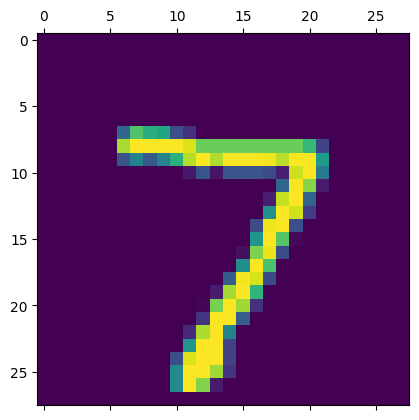

In [13]:
plt.matshow(X_test[0])
plt.show()

In [14]:
y_predicted[0]

array([3.2758649e-02, 4.0350992e-07, 9.0205051e-02, 9.6748388e-01,
       3.3663535e-03, 9.2224173e-02, 1.8484602e-06, 9.9981415e-01,
       1.2031940e-01, 6.8348658e-01], dtype=float32)

In [15]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

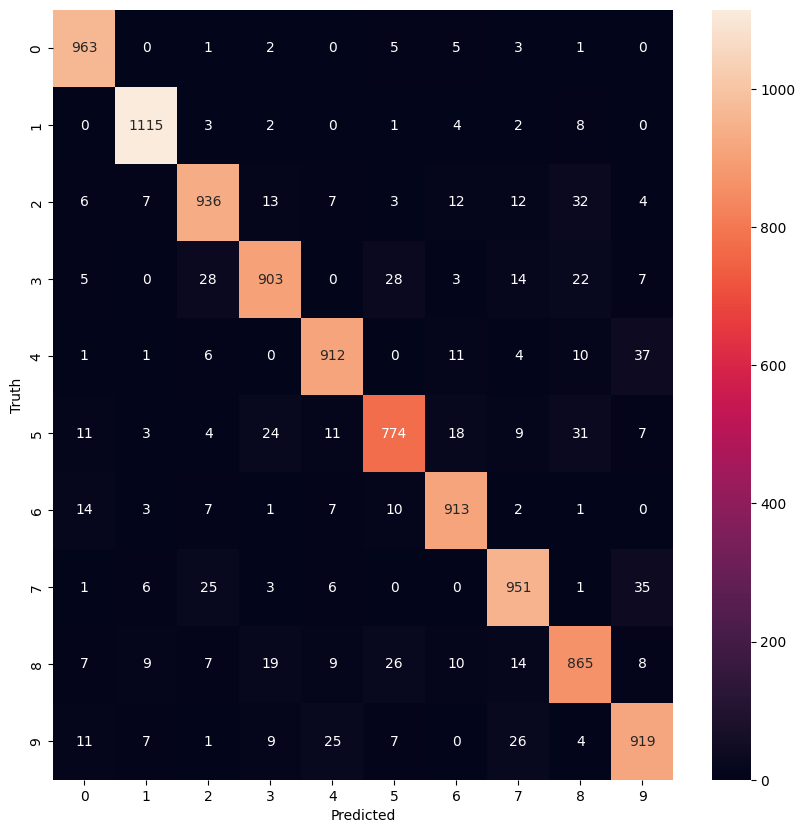

In [16]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [17]:
model_with_hidden_layer = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784, ), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model_with_hidden_layer.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
model_with_hidden_layer.fit(flattened_X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2697 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1186 - accuracy: 0.9648
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0829 - accuracy: 0.9755
Epoch 4/5
 850/1875 [============>.................] - ETA: 1s - loss: 0.0571 - accuracy: 0.9819

In [ ]:
model_with_hidden_layer.evaluate(flattened_X_test, y_test)

In [ ]:
y_predicted = model_with_hidden_layer.predict(flattened_X_test)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
confusionMatrix = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(confusionMatrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()